In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Cargar los archivos Excel
stros_path = 'dataframe_siniestros.xlsx'
df = pd.read_excel(stros_path)
    

Objetivo
Generar insights sobre los siniestros de los asegurados a partir de los datos históricos, con el objetivo de identificar patrones, factores de riesgo y oportunidades de mejora en la gestión de siniestros.

Contexto Comercial
Somos un broker de seguros que busca optimizar la gestión de siniestros y anticipar riesgos asociados a ciertos perfiles o tipos de vehículos. A partir de estos insights, se pueden tomar acciones preventivas y mejorar la comunicación con los asegurados para fomentar la transparencia y la confianza.

Problema Comercial
Para gestionar los siniestros de manera más efectiva y reducir la frecuencia de ocurrencias, es crucial entender qué factores están relacionados con un mayor riesgo. Esto implica analizar los datos de siniestros para identificar patrones en las características del asegurado, el tipo de siniestro, y la frecuencia de ocurrencia.

Contexto Analítico
Para desarrollar el análisis de siniestros y extraer insights, se cuenta con la siguiente información en el dataset de siniestros:

Con lesionados: Indica si el siniestro involucró lesionados.
Póliza: Número de la póliza asociada al siniestro.
Ocurrencia: Fecha en que ocurrió el siniestro.
Estado: Estado de resolución del siniestro (ej. en trámite, terminado con pago).
Tipo de siniestro: Clasificación del tipo de siniestro (ej. daños a terceros, parabrisas).
Culpa: Identificación de la responsabilidad en el siniestro.
Vehículo: Información sobre el vehículo involucrado, incluyendo marca, modelo, y año.
Frecuencia siniestral: Datos sobre la frecuencia de siniestros tanto a nivel individual como en el total de la cartera.
Características del asegurado: Sexo, edad, y código postal, entre otros.
Con esta información, se buscará analizar y extraer insights sobre la siniestralidad, con especial énfasis en la frecuencia de siniestros, características demográficas de los asegurados y el tipo de siniestros reportados. Esto permitirá tomar decisiones informadas para mejorar la rentabilidad y minimizar los costos asociados a siniestros.

In [237]:
# Distribución de cada columna
print("Distribución de cada columna:\n")
print(df.describe())

Distribución de cada columna:

                          Ocurrencia  Codigo Postal  Año_Ocurrencia  \
count                           1369    1369.000000     1369.000000   
mean   2022-10-11 13:38:20.949598208    1760.421476     2022.276114   
min              2020-01-10 00:00:00    1001.000000     2020.000000   
25%              2021-09-12 00:00:00    1661.000000     2021.000000   
50%              2022-12-15 00:00:00    1663.000000     2022.000000   
75%              2023-11-19 00:00:00    1665.000000     2023.000000   
max              2024-09-28 00:00:00    8129.000000     2024.000000   
std                              NaN     656.223296        1.302166   

       Q stros mismo vh  Q aseg mismo vh  Q total marcas y modelos  \
count       1369.000000      1369.000000               1369.000000   
mean           9.058437        28.248356               1945.515705   
min            1.000000         0.000000               1487.000000   
25%            3.000000         9.000000         

Vamos a verificar si hay datos nulos

In [238]:
# Verificar valores nulos
print(df.isnull().sum())

Con lesionados              0
Póliza                      0
Ocurrencia                  0
Estado                      0
Tipo Siniestro              0
Culpa                       0
Marca                       0
Modelo                      0
Patente                     0
Codigo Postal               0
Sexo                        0
Año_Vehiculo                0
Año_Ocurrencia              0
Q stros mismo vh            0
Q aseg mismo vh             0
Q total marcas y modelos    0
Frec. stral. x vh           0
Frecuencia stral. total     0
Edad                        0
dtype: int64


In [239]:
# Tipos de datos y existencia de valores faltantes
print("\nTipos de datos:\n")
print(df.dtypes)



Tipos de datos:

Con lesionados                      object
Póliza                              object
Ocurrencia                  datetime64[ns]
Estado                              object
Tipo Siniestro                      object
Culpa                               object
Marca                               object
Modelo                              object
Patente                             object
Codigo Postal                        int64
Sexo                                object
Año_Vehiculo                        object
Año_Ocurrencia                       int64
Q stros mismo vh                     int64
Q aseg mismo vh                      int64
Q total marcas y modelos             int64
Frec. stral. x vh                  float64
Frecuencia stral. total            float64
Edad                                 int64
dtype: object


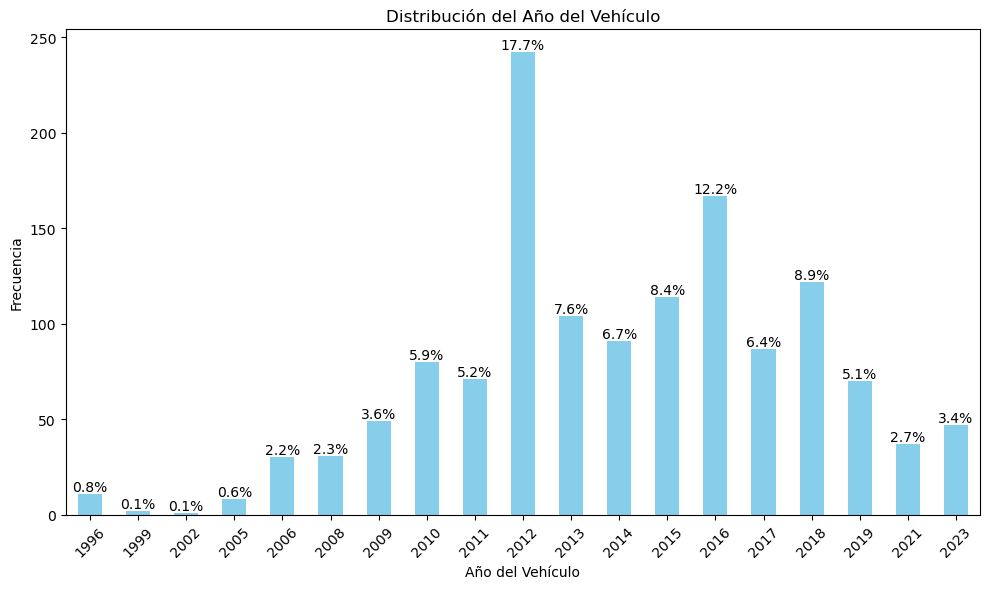

In [240]:
# 1. Distribución del Año del Vehículo (excluyendo "Año desconocido")
plt.figure(figsize=(10, 6))
df_ano_vehiculo = df[df['Año_Vehiculo'] != 'Año desconocido']
df_ano_vehiculo_count = df_ano_vehiculo['Año_Vehiculo'].value_counts().sort_index()
df_ano_vehiculo_count.plot(kind='bar', color='skyblue')
for index, value in enumerate(df_ano_vehiculo_count):
    plt.text(index, value, f'{(value / df_ano_vehiculo_count.sum()) * 100:.1f}%', ha='center', va='bottom')
plt.title('Distribución del Año del Vehículo')
plt.xlabel('Año del Vehículo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

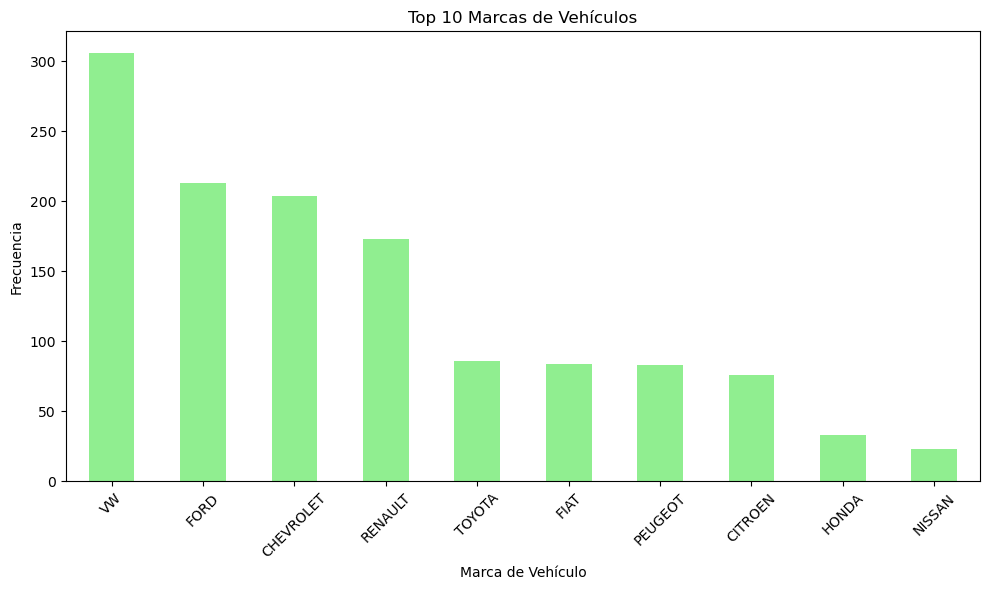

In [241]:
# 2. Top 10 Marcas de Vehículos
plt.figure(figsize=(10, 6))
df['Marca'].value_counts().nlargest(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Marcas de Vehículos')
plt.xlabel('Marca de Vehículo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

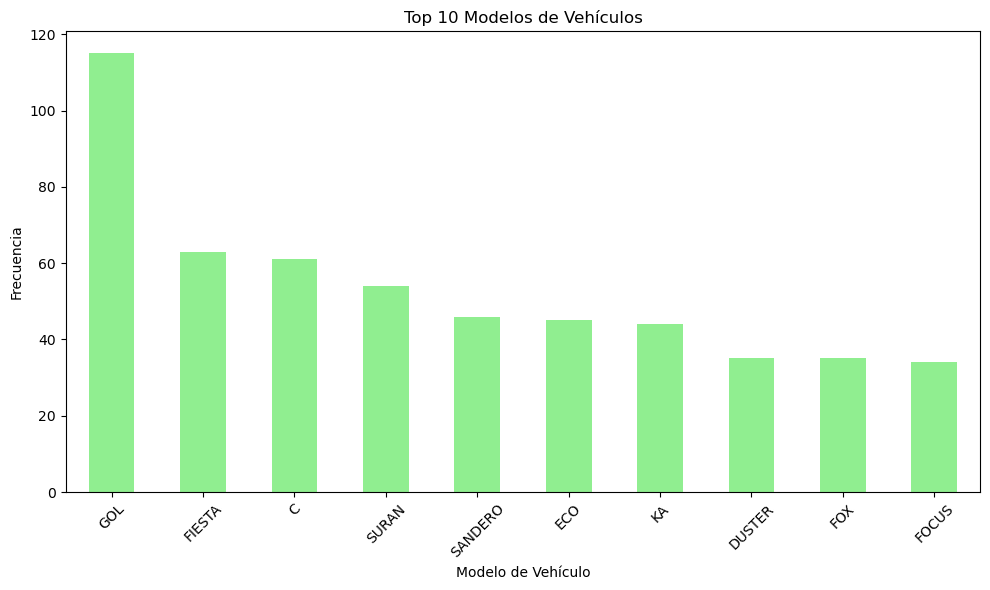

In [242]:
# 3. Top 10 modelos de Vehículos
plt.figure(figsize=(10, 6))
df['Modelo'].value_counts().nlargest(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Modelos de Vehículos')
plt.xlabel('Modelo de Vehículo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

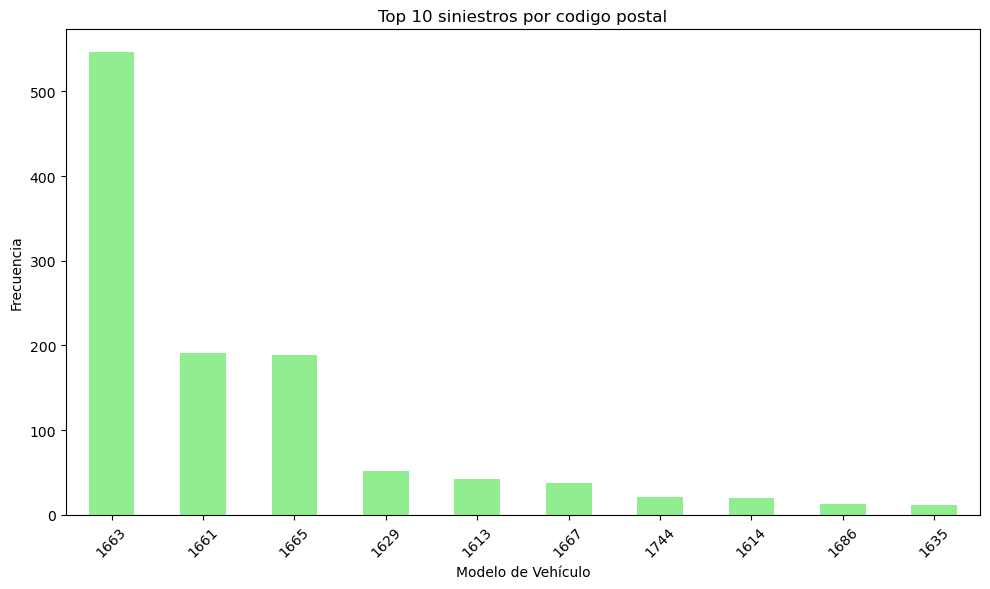

In [243]:
# 4. Top 10 siniestros por codigo postal
plt.figure(figsize=(10, 6))
df['Codigo Postal'].value_counts().nlargest(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 siniestros por codigo postal')
plt.xlabel('Modelo de Vehículo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

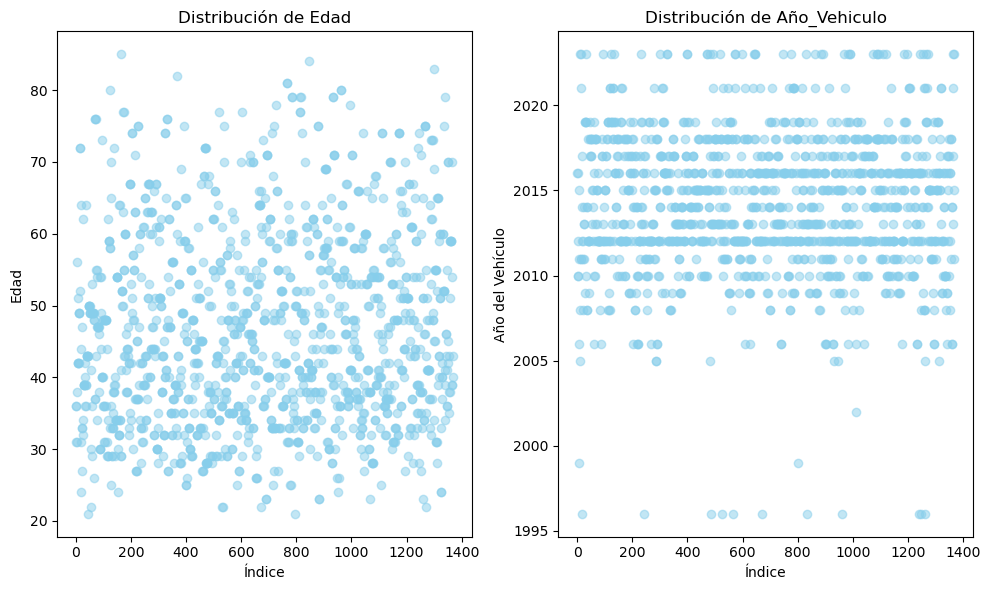

In [244]:
# Convertir la columna 'Año_Vehiculo' a numérico, reemplazando valores no numéricos
df['Año_Vehiculo'] = pd.to_numeric(df['Año_Vehiculo'], errors='coerce')

# Filtrar los datos para gráficos de dispersión de 'Edad' y 'Año_Vehiculo'
plt.figure(figsize=(10, 6))

# Gráfico de dispersión para 'Edad'
plt.subplot(1, 2, 1)
df_edad = df[df['Edad'].notna()]
plt.scatter(df_edad.index, df_edad['Edad'], alpha=0.5, color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Índice')
plt.ylabel('Edad')
plt.tight_layout()

# Gráfico de dispersión para 'Año_Vehiculo'
plt.subplot(1, 2, 2)
df_ano_vehiculo = df[df['Año_Vehiculo'].notna()]
plt.scatter(df_ano_vehiculo.index, df_ano_vehiculo['Año_Vehiculo'], alpha=0.5, color='skyblue')
plt.title('Distribución de Año_Vehiculo')
plt.xlabel('Índice')
plt.ylabel('Año del Vehículo')
plt.tight_layout()

plt.show()

ELIMINO LOS VEHICULOS CON AÑOS MENORES A 2004

In [245]:
df = df[df['Año_Vehiculo'] >= 2004]

In [246]:
bins_ano_vehiculo = [2004, 2009, 2015, 2020, float('inf')]
labels_ano_vehiculo = ['2004-2009', '2010-2015', '2016-2020', '2021 en adelante']
df['Año_Vehiculo_Grupo'] = pd.cut(df['Año_Vehiculo'], bins=bins_ano_vehiculo, labels=labels_ano_vehiculo)

In [247]:
bins_edad = [18, 35, 50, 65, float('inf')]
labels_edad = ['18-35', '35-50', '50-65', 'Más de 65']
df['Edad_Grupo'] = pd.cut(df['Edad'], bins=bins_edad, labels=labels_edad)

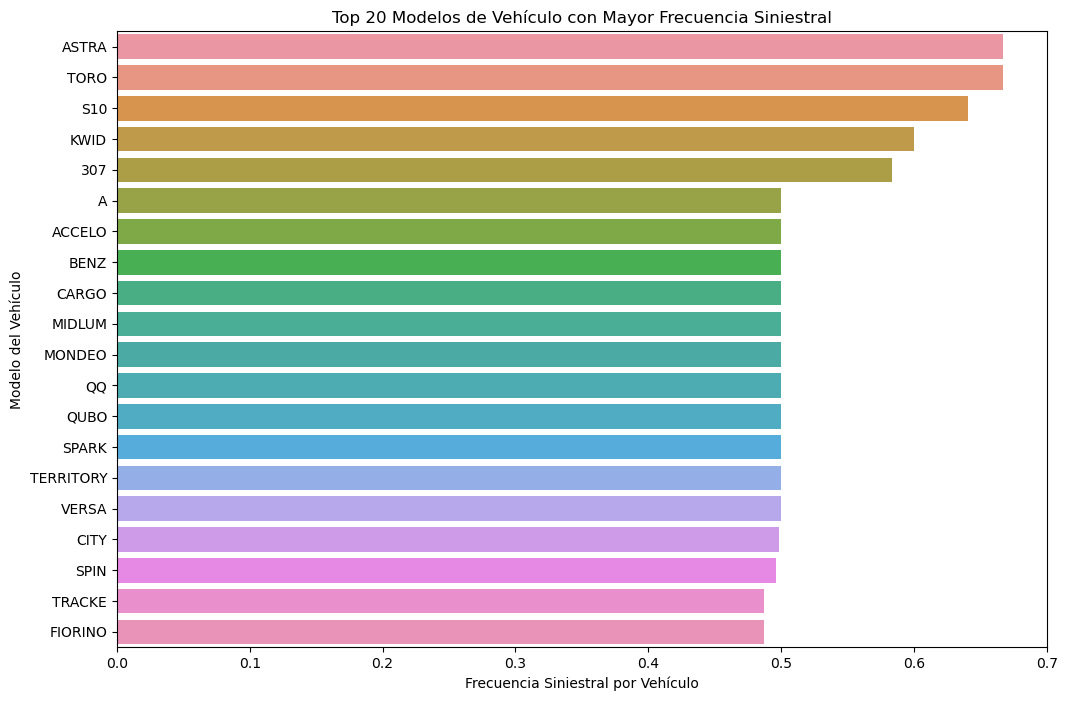

In [248]:
# Filtrar los datos para incluir solo frecuencias siniestrales menores a 1
df_filtered = df[df['Frec. stral. x vh'] < 1]

# Seleccionar los 20 modelos con mayor frecuencia siniestral
model_freq = df_filtered.groupby('Modelo')['Frec. stral. x vh'].mean().nlargest(20).reset_index()

# Gráfico de "Frec. stral. x vh" por "Modelo" (Top 20)
plt.figure(figsize=(12, 8))
sns.barplot(data=model_freq, x='Frec. stral. x vh', y='Modelo', order=model_freq['Modelo'])
plt.title('Top 20 Modelos de Vehículo con Mayor Frecuencia Siniestral')
plt.xlabel('Frecuencia Siniestral por Vehículo')
plt.ylabel('Modelo del Vehículo')
plt.show()

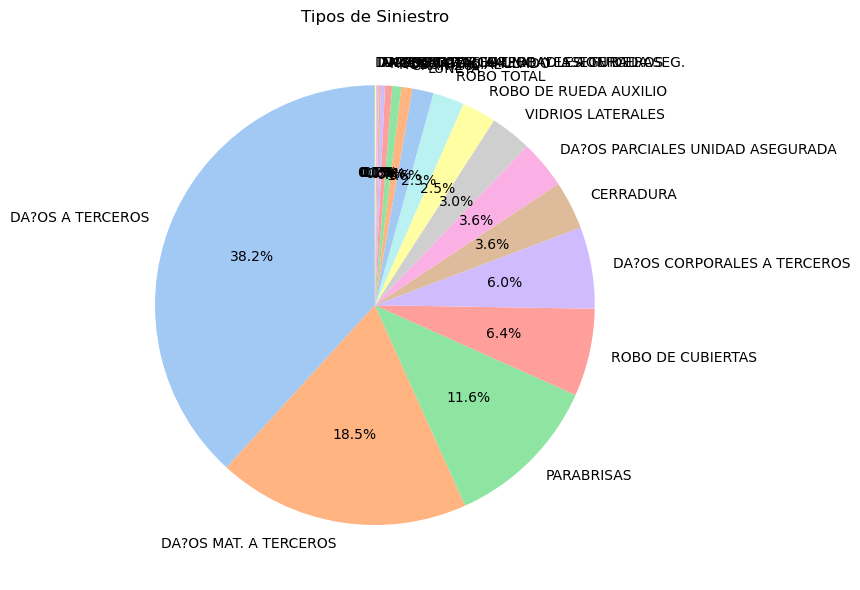

In [249]:
# 3. Distribución de Tipos de Siniestro
plt.figure(figsize=(10, 6))
df['Tipo Siniestro'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Tipos de Siniestro')
plt.ylabel('')
plt.tight_layout()
plt.show()


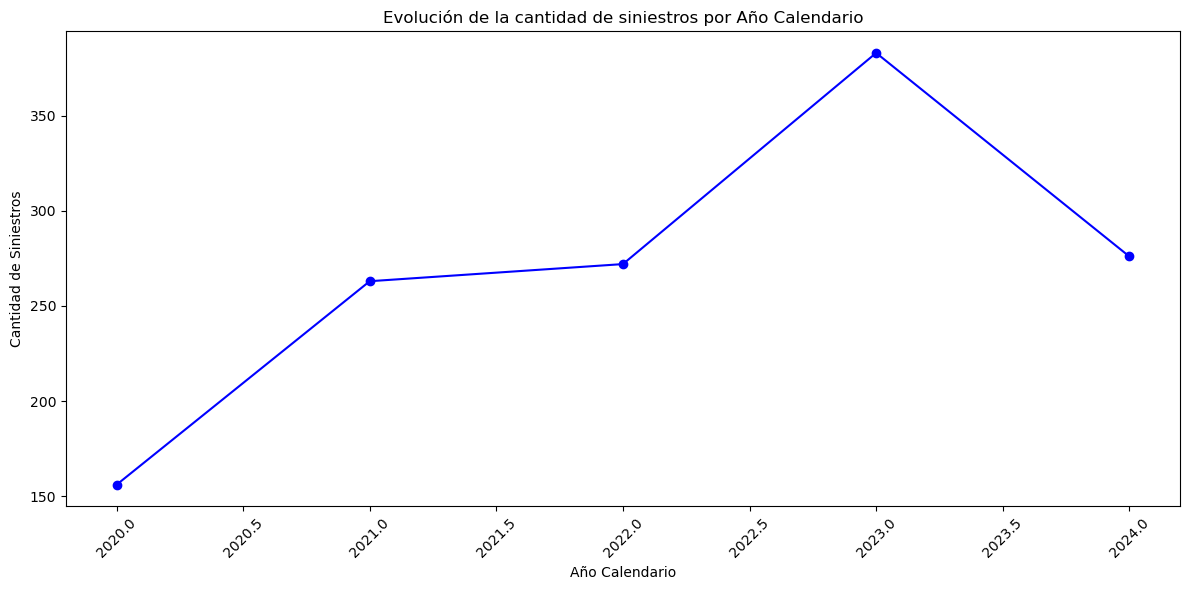

In [250]:
# 4. Evolución de la cantidad de siniestros por año calendario
plt.figure(figsize=(12, 6))
df['Ocurrencia'] = pd.to_datetime(df['Ocurrencia'], errors='coerce')
df['Año_Calendario'] = df['Ocurrencia'].dt.year
df_anio_calendario_count = df['Año_Calendario'].value_counts().sort_index()
df_anio_calendario_count.plot(kind='line', marker='o', color='blue')
plt.title('Evolución de la cantidad de siniestros por Año Calendario')
plt.xlabel('Año Calendario')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AGRUPO AÑOS DE VEHICULO EDAD Y CODIGO POSTAL POR RANGOS PARA FACILITAR EL ANALISIS

In [251]:
bins_ano_vehiculo = [2004, 2009, 2015, 2020, float('inf')]
labels_ano_vehiculo = ['2004-2009', '2010-2015', '2016-2020', '2021 en adelante']
df['Año_Vehiculo_Grupo'] = pd.cut(df['Año_Vehiculo'], bins=bins_ano_vehiculo, labels=labels_ano_vehiculo)

In [252]:
bins_edad = [18, 35, 50, 65, float('inf')]
labels_edad = ['18-35', '35-50', '50-65', 'Más de 65']
df['Edad_Grupo'] = pd.cut(df['Edad'], bins=bins_edad, labels=labels_edad)

In [253]:
# Agrupar los códigos postales más frecuentes en categorías y etiquetar el resto como 'Resto'
df['Codigo_Postal_Grupo'] = df['Codigo Postal'].apply(lambda x: str(x) if x in [1663, 1665, 1661, 1629, 1613] else 'Resto')


Creo nuevas columna "Robo" "Acc. vial" etc.  y asigno "Si" a las filas segun el tipo de siniestro mas general "ROBO" "DAÑOS" para reducir la granularidad

In [254]:
df['Robo'] = df['Tipo Siniestro'].apply(lambda x: 'Si' if 'ROBO' in x else 'No')
df['Acc. vial'] = df['Tipo Siniestro'].apply(lambda x: 'Si' if 'DA?OS' in x or 'D. MATERIALES A TERC. Y LESION DEL ASEG.' in x else 'No')
df['Incendio'] = df['Tipo Siniestro'].apply(lambda x: 'Si' if 'INCENDIO' in x else 'No')
df['Cerradura'] = df['Tipo Siniestro'].apply(lambda x: 'Si' if 'CERRADURA' in x else 'No')
df['Granizo'] = df['Tipo Siniestro'].apply(lambda x: 'Si' if 'GRANIZO' in x else 'No')
df['Cristales'] = df['Tipo Siniestro'].apply(lambda x: 'Si' if any(y in x for y in ['LUNETA', 'PARABRISAS', 'VIDRIOS LATERALES']) else 'No')

Creo una nueva columna "Cristales" y asigno "Si" a las filas que contienen "LUNETA", "PARABRISAS" o "VIDRIOS LATERALES" en "Tipo Siniestro"

In [255]:

df['Cristales'] = df['Tipo Siniestro'].apply(lambda x: 'Si' if any(y in x for y in ['LUNETA', 'PARABRISAS', 'VIDRIOS LATERALES']) else 'No')

Creo una nueva columna "Antena" y asigno "Si" a las filas que contienen "ANTENA" en "Tipo Siniestro"

In [256]:

df['Antena'] = df['Tipo Siniestro'].apply(lambda x: 'Si' if 'ANTENA' in x else 'No')

ELIMINO LA COLUMNA "TIPO SINIESTRO" (YA SE ENCUENTRA CLASIFICADA), "ESTADO" Y "PATENTE" YA QUE NO NOS SERVIRÁ EN EL ANALISIS 

In [257]:
df = df.drop(columns=['Tipo Siniestro', 'Estado'])  #,'Patente'

PREPARO EL DF PARA ANALISIS 

In [258]:
# Convertir otras columnas categóricas en binarias
columns_to_convert_binary = ['Con lesionados','Robo', 'Acc. vial', 'Incendio', 'Cerradura', 'Granizo', 'Cristales', 'Antena']
for column in columns_to_convert_binary:
    df[column] = df[column].apply(lambda x: 1 if x == 'Si' else 0)

In [259]:
# Limpiar  'Siniestro' y 'Póliza' quitando letras y caracteres no numéricos

#df['Siniestro'] = df['Siniestro'].astype(str).str.replace('/', '')    # Eliminar '/' de 'Siniestro'
df['Póliza'] = df['Póliza'].astype(str).str.replace('/', '')          # Eliminar '/' de 'Póliza'


FECHAS

In [260]:
df['Ocurrencia'] = pd.to_datetime(df['Ocurrencia'])

In [261]:
# Crear nuevas características a partir de la columna 'Ocurrencia'
df['Año_Ocurrencia'] = df['Ocurrencia'].dt.year
df['Mes_Ocurrencia'] = df['Ocurrencia'].dt.month
df['Día_Ocurrencia'] = df['Ocurrencia'].dt.day
df['Día_Semana_Ocurrencia'] = df['Ocurrencia'].dt.weekday


In [262]:
df['Mes_sin'] = np.sin(2 * np.pi * df['Mes_Ocurrencia'] / 12)
df['Mes_cos'] = np.cos(2 * np.pi * df['Mes_Ocurrencia'] / 12)
df['Día_Semana_sin'] = np.sin(2 * np.pi * df['Día_Semana_Ocurrencia'] / 7)
df['Día_Semana_cos'] = np.cos(2 * np.pi * df['Día_Semana_Ocurrencia'] / 7)

In [263]:
df = df.drop(columns=['Ocurrencia'])


In [265]:
# Eliminar las columnas especificadas
columns_to_drop = [
    'Póliza', 'Codigo Postal', 'Año_Vehiculo', 'Q aseg mismo vh',
    'Q total marcas y modelos', 'Frecuencia stral. total']
df = df.drop(columns=columns_to_drop)

Elimino filas con valores nulos e infinitos

In [266]:
df_cleaned = df.dropna()

df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

Selecciono las columnas relevantes para el análisis

In [267]:
columns_for_analysis = ['Frec. stral. x vh', 'Año_Ocurrencia', 'Edad']
df_for_kmeans = df_cleaned[columns_for_analysis]

In [268]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_for_kmeans)

Determino el numero optimo de cluster para analisis

In [269]:
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

Visualizo en el gráfico

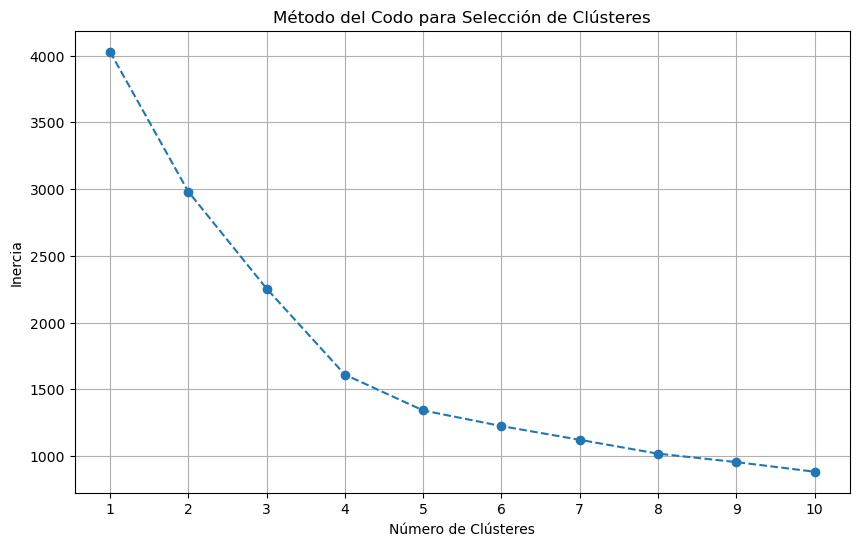

In [270]:

plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Método del Codo para Selección de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(range_clusters)
plt.grid()
plt.show()

Numero de cluster optimo segun el analisis

In [271]:

optimal_clusters = 3 

Aplico k means para agrupar

In [272]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)

In [273]:
cluster_counts = df_cleaned['Cluster'].value_counts()

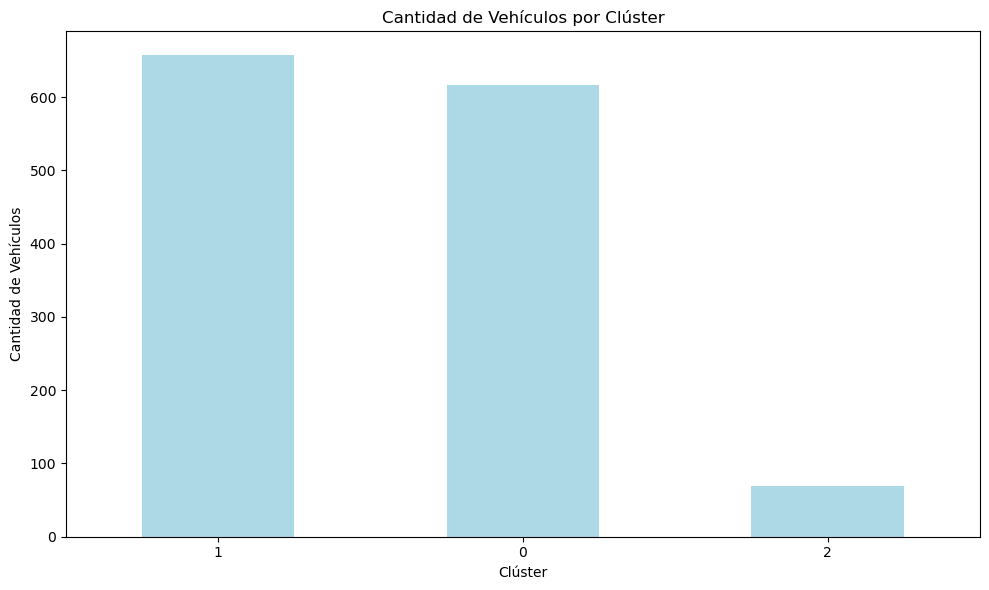

In [274]:
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='lightblue')
plt.title('Cantidad de Vehículos por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad de Vehículos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Caracteristicas de cada cluster

In [275]:
cluster_analysis = df_cleaned.groupby('Cluster')[
    ['Frec. stral. x vh', 'Año_Ocurrencia', 'Edad']
].mean()

print(cluster_analysis)

         Frec. stral. x vh  Año_Ocurrencia       Edad
Cluster                                              
0                 0.345225     2023.418152  45.633712
1                 0.305918     2021.178082  47.035008
2                 1.048965     2022.202899  46.507246


La conclusión final es que, al realizar este análisis con K-Means, descubrí un grupo de vehículos que tienen una alta frecuencia siniestral promedio. Esto me hizo pensar en cómo estos datos pueden usarse para tomar decisiones más informadas. Estos vehículos representan un mayor riesgo para la aseguradora, y ajustar las primas para reflejar ese riesgo parece ser una medida lógica y necesaria. Además, al analizar modelos, antigüedad y otras características, entendí que estos patrones no solo ayudan a gestionar riesgos, sino también a construir estrategias más claras y efectivas.